In [1]:
cd E:\ADG\Data_Set\Glass

E:\ADG\Data_Set\Glass


In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv('datasets_738_1370_glass.csv')
data.head()




,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
data.isnull().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
data['Type'] = data['Type'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null category
dtypes: category(1), float64(9)
memory usage: 15.5 KB


In [9]:
Y = data['Type']
X = data.drop(['Type'], axis = 1)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
new_data= pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])

In [27]:
p1 = new_data['principal component 1']
p2 = new_data['principal component 2']
l1 = []
for i in range(len(p1)):
    l1.append((Y[i], p1[i], p2[i]))
    
print(l1)

[(1, -1.4314246907862773, -1.1021149921502869), (1, -1.436706786788268, 0.3435852707849094), (1, -1.4273218143426567, 0.34572009575368223), (1, -1.2578248109173435, -0.24905989230750686), (1, -1.3124663880288219, -0.01840450811678138), (1, -1.3018675145796048, -0.1224048010059147), (1, -1.2365698445345046, -0.07808039143563132), (1, -1.203348821444617, -0.18172151678551896), (1, -1.100992021692619, 0.009137371980510015), (1, -1.0735555194740003, -0.30491532679097766), (1, -1.1878688452003385, -0.04863578071351293), (1, -1.0184336201442628, -0.5303867096439085), (1, -1.2001925559233855, 0.03232148121954553), (1, -1.0640763395678112, -0.3114075194270881), (1, -1.0105746760146965, -0.4685182024242599), (1, -1.049043957276171, -0.3241782862086372), (1, -0.9392257012781767, -0.6780396616379053), (1, -0.69762824521147, -0.8406504290935888), (1, -0.7808101908632954, -0.5853487258612572), (1, -0.9830035255832457, -0.25651502703602186), (1, -0.9486185955940843, -0.44094365816875963), (1, -0.743

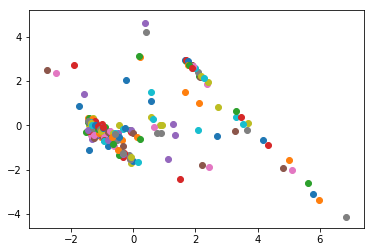

In [55]:
import matplotlib.pyplot as plt
for i in l1:
    if i[0] == 1:
        plt.scatter(i[1], i[2], label = i[0])
    if i[0] == 2:
        plt.scatter(i[1], i[2], label = i[0])
    if i[0] == 3:
        plt.scatter(i[1], i[2], label = i[0])
    if i[0] == 4:
        plt.scatter(i[1], i[2], label = i[0])
    if i[0] == 5:
        plt.scatter(i[1], i[2], label = i[0])
    if i[0] == 6:
        plt.scatter(i[1], i[2], label = i[0])
    if i[0] == 7:
        plt.scatter(i[1], i[2], label = i[0])
        
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_data, Y, test_size = 0.3, random_state = 0)

In [109]:
def euclidian_dist(a, b, c, d):
    dist = 0
    dist = ((a - c)**2 + (b - d)**2)**(1/2)
    return dist
    
c1 = x_test['principal component 1']
c2 = x_test['principal component 2']
c1_train = x_train['principal component 1']
c2_train = x_train['principal component 2']
l = []
ll = []
y_pred = []
d = 0

for i in range(len(c1)):
    for j in range(len(c1_train)):
        d = euclidian_dist(c1[i], c2[i], c1_train[j], c2_train[j])
        l.append((d, c1_train[j], c2_train[j]))
    for k in l:
        ll.append(k[0])
    m = min(ll)
    for k in l:
        if k[0] == m:
            x_co = k[1]
            y_co = k[2]
            break
            
    for k in l1:
        if k[1] == x_co and k[2] == y_co:
            y_pred.append(k[0])
            break
            
    l = []
    ll = []
    
print(y_pred)

[7, 1, 1, 2, 5, 2, 1, 1, 2, 2, 1, 3, 1, 2, 2, 7, 1, 2, 2, 3, 6, 1, 7, 7, 1, 1, 7, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 7, 2, 5, 2, 3, 2, 2, 1, 2, 3, 2, 2, 5, 7, 1, 2, 1, 1, 1, 3, 2, 1, 2, 1, 2, 1]


In [120]:
a = y_test.tolist()

In [122]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, a)

print("Accuracy using KNN is ", acc)

Accuracy using KNN is  0.6
